Epoch 1/500
1/1 [==============================] - 1s 683ms/step - loss: 1.1280 - accuracy: 0.2872 - val_loss: 1.0953 - val_accuracy: 0.1818
Epoch 2/500
1/1 [==============================] - 0s 21ms/step - loss: 1.1022 - accuracy: 0.3191 - val_loss: 1.1012 - val_accuracy: 0.1818
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 1.0655 - accuracy: 0.3723 - val_loss: 1.0855 - val_accuracy: 0.1818
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 1.0497 - accuracy: 0.3617 - val_loss: 1.0502 - val_accuracy: 0.1818
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 1.0332 - accuracy: 0.3830 - val_loss: 0.9954 - val_accuracy: 0.1818
Epoch 6/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0086 - accuracy: 0.5426 - val_loss: 0.9364 - val_accuracy: 0.7273
Epoch 7/500
1/1 [==============================] - 0s 21ms/step - loss: 0.9795 - accuracy: 0.5851 - val_loss: 0.8719 - val_accuracy: 1.0000
Epoch 8/500
1/1 [==

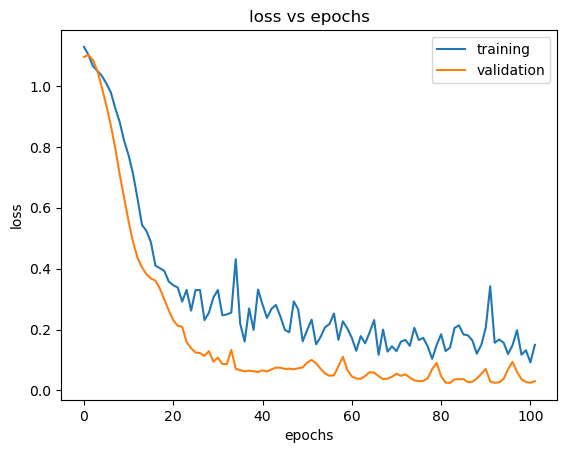

In [2]:
'''
iris데이터셋을 시각화 한 결론에 의한 모델 구성

데이터의 분포가 종별로 중심점을 기준으로 모여있음-> 간단하게 KNN알고리즘으로 해결 할 수 있음
'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping,Callback
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


iris_dataset=load_iris()
data=iris_dataset["data"]
targets=iris_dataset["target"]
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.3)

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))


early_stopping=EarlyStopping(monitor='val_loss',patience=100,min_delta=1e-5,mode='max')

def get_model(wd,rate):
    model=Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd),activation="relu",input_shape=(train_data[0].shape)),
        Dropout(rate),
        Dense(128,activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(128,activation="relu"),
        Dropout(rate),
        Dense(128,activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(3,activation="softmax")  
        #렐루는 돌아가고 시그모이드는 왜 안돌아가는거임??? 시그모이드는 1로 돌려야 가능 렐루는 아무출력이나 상관없음
    ])
    return model

model=get_model(1e-5,0.2)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(train_data,train_targets,validation_split=0.1,batch_size=256,epochs=500,callbacks=[early_stopping])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

In [3]:
train_data.shape

(105, 4)

In [ ]:
print(train_targets.shape, test_targets.shape,train_data.shape)
test_targets.shape[0]
train_data.shape[1]
train_data[0].shape
print(name[np.argmax(prediction[2])])

In [ ]:
prediction=model.predict(test_data)

name=iris_dataset['target_names']
#print(name[np.argmax(prediction[0])])
# print(prediction)
# print(test_targets)
for i in range(len(prediction)):
    print("예측값: {0}    실제값: {1}".format(name[np.argmax(prediction[i])],name[np.argmax(test_targets[i])]))

In [31]:
print(

train_data.shape,

test_data.shape,

train_targets.shape,

test_targets.shape

)

(135, 4) (15, 4) (135,) (15,)


In [ ]:
iris_dataset.keys()
for key, value in iris_dataset.items():
    print(key,value)